In [31]:
from noisypy.data.datasets.noisylabels import NoisyLabelsLoader
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

CIFAR10_LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
nll = NoisyLabelsLoader("cifar10", "../../../data/noisylabels", download=True)

clean_labels = nll.load_label("clean_label")
aggre_labels = nll.load_label("aggre_label")
random1_labels = nll.load_label("random_label1")
worst_labels = nll.load_label("worse_label")

cmat_aggre = np.zeros((10, 10), dtype=float)
cmat_rand1 = np.zeros((10, 10), dtype=float)
cmat_worst = np.zeros((10, 10), dtype=float)
for i in range(10):
    for j in range(10):
        cmat_aggre[i, j] = (clean_labels == i)[aggre_labels == j].sum()
        cmat_rand1[i, j] = (clean_labels == i)[random1_labels == j].sum()
        cmat_worst[i, j] = (clean_labels == i)[worst_labels == j].sum()

cmat_aggre_norm = cmat_aggre / cmat_aggre.sum(axis=1, keepdims=True)
cmat_rand1_norm = cmat_rand1 / cmat_rand1.sum(axis=1, keepdims=True)
cmat_worst_norm = cmat_worst / cmat_worst.sum(axis=1, keepdims=True)

cmat_aggre_norm[cmat_aggre_norm == 0] = np.nan
cmat_rand1_norm[cmat_rand1_norm == 0] = np.nan
cmat_worst_norm[cmat_worst_norm == 0] = np.nan

Label file already downloaded and verified.


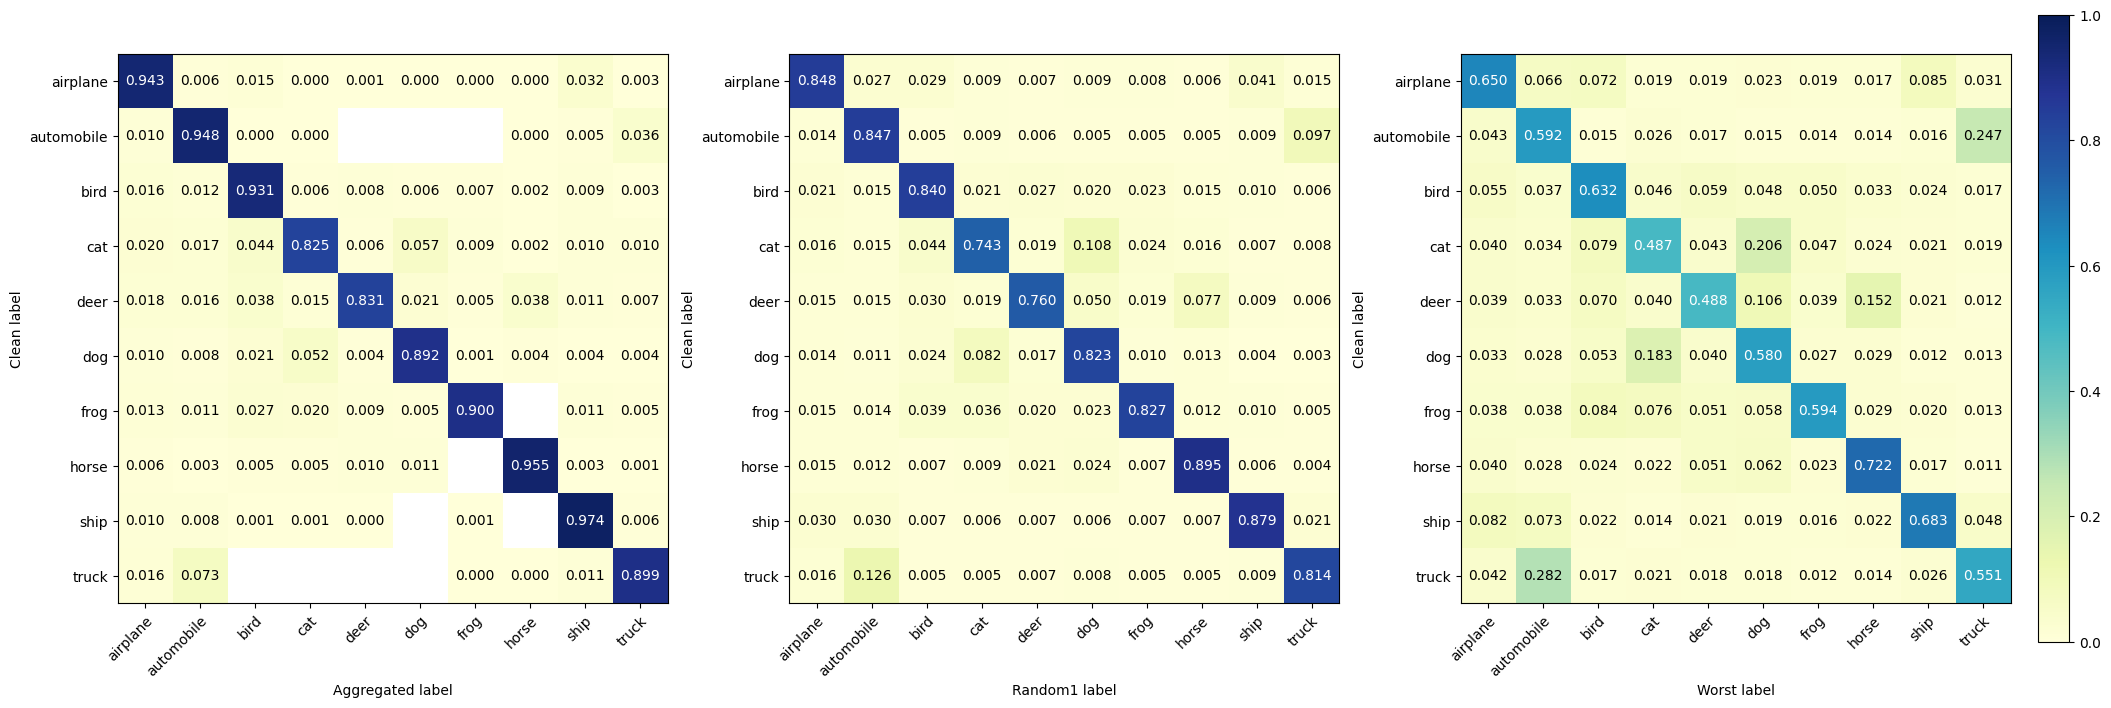

In [32]:
fig, ax = plt.subplots(1,3, figsize= (21, 7), layout='constrained')

cax =  ax[0].imshow(cmat_aggre_norm, cmap="YlGnBu", vmin=0, vmax=1)
cax1 = ax[1].imshow(cmat_rand1_norm, cmap="YlGnBu",vmin=0, vmax=1)
cax2 = ax[2].imshow(cmat_worst_norm, cmap="YlGnBu",vmin=0, vmax=1)
fig.colorbar(cax2, ax=ax[2], orientation='vertical')

# add text
for i in range(10):
    for j in range(10):
        ax[0].text(j, i, f"{cmat_aggre_norm[i, j]:.3f}", ha='center', va='center', color='black' if cmat_aggre_norm[i, j] < 0.3 else 'white')
        ax[1].text(j, i, f"{cmat_rand1_norm[i, j]:.3f}", ha='center', va='center', color='black' if cmat_rand1_norm[i, j] < 0.3 else 'white')
        ax[2].text(j, i, f"{cmat_worst_norm[i, j]:.3f}", ha='center', va='center', color='black' if cmat_worst_norm[i, j] < 0.3 else 'white')

# add white grid
for a in ax:
    a.set_xticks(range(len(CIFAR10_LABELS)), labels=CIFAR10_LABELS, rotation=45, rotation_mode='anchor', ha='right')
    a.set_yticks(range(len(CIFAR10_LABELS)), labels=CIFAR10_LABELS)
    a.set_ylabel("Clean label")





ax[0].set_xlabel("Aggregated label")
ax[1].set_xlabel("Random1 label")
ax[2].set_xlabel("Worst label")

# save fig
fig.savefig("cifarn_noise_cmaps.pdf")